# Homework 4: Vector Space Models

## Due Date: Feb 9th
## Total Points: 76 (+ 15 extra credit)
- **Overview**: In this assignment you will implement many of the things you learned in [Chapter 5 of the textbook](https://web.stanford.edu/~jurafsky/slp3/5.pdf). If you haven't read it yet, now would be a good time to do that.  We'll wait.  Done?  Great, let's move on.
    
    We will provide a corpus of Shakespeare plays, which you will use to create a term-document matrix and a term-context matrix. You'll implement a selection of the weighting methods and similarity metrics defined in the textbook. Ultimately, your goal is to use the resulting vectors to measure how similar Shakespeare plays are to each other, and to find words that are used in a similar fashion. All (or almost all) of the code you write will be direct implementations of concepts and equations described in [Chapter 5, sections 5.3-5.7](https://web.stanford.edu/~jurafsky/slp3/5.pdf).

    *All difficulties are easy when they are known.*
- **Delieverables:**
    - Your implementations for the functions in the skeleton code (this notebook)
    - Write Up (include this in a separate report.pdf) (Manually Graded)
      - answers to questions: 5, and optional Extra Credit


- **Grading**: We will use the auto-grading system called `PennGrader`. To complete the homework assignment, you should implement anything marked with `#TODO` and run the cell with `#PennGrader` note. **There will be no hidden tests in this assignment.** In other words, you will know your score once you finish all the `#TODO` and run all the `#PennGrader` tests!


## Recommended Readings

- [Vector Semantics](https://web.stanford.edu/~jurafsky/slp3/6.pdf). Dan Jurafsky and James H. Martin. Speech and Language Processing (3rd edition draft)
- [From Frequency to Meaning: Vector Space Models of Semantics](https://www.jair.org/media/2934/live-2934-4846-jair.pdf). Peter D. Turney and Patrick Pantel. Journal of Artificial Intelligence Research 2010
- [Paraphrasing for Style](http://www.aclweb.org/anthology/C12-1177) Wei Xu, Alan Ritter, Bill Dolan, Ralph Grisman, and Colin Cherry. Coling 2012
- [Evaluation methods for unsupervised word embeddings](http://www.aclweb.org/anthology/D15-1036) Tobias Schnabel, Igor Labutov, David Mimno, Thorsten Joachims. EMNLP 2015
- [Community Evaluation and Exchange of Word Vectors at wordvectors.org.](http://www.aclweb.org/anthology/P14-5004) Manaal Faruqui and Chris Dyer. ACL demos 2014

## FAQs

- When finding the top 10 similar items for a given target element, should I count the target element?  
    *No, do not count the target element.*

- How can I represent a character as a vector for calculating similarity?  
    *One reasonable way would be to do it much in the same way as for plays. You would just need to write code to segment out each character as the given code did for each play.*

- What kind of analysis can I perform on the female and male Shakespearean characters for the report?  
    *There can be various ways to go about this. You can look at PCA projections of the vectors representing the characters in the plays to see if the men and women cluster in distinct areas that are demarcated. Or you can look at the similarity scores among women, among men and compare it to the similarity scores between men and men to see if it is significantly different. To account for outliers, you can use averages in this case. Feel free to play around with different vector representations and different similarity measures.*

- How can I improve the performance and efficiency of my code?  
    *Try to use vectorized code wherever possible instead of using loops. You can refer to this resource on [vectorized code](http://www.cs.cornell.edu/courses/cs1112/2015sp/Exams/exam2/vectorizedCode.pdf).*

- How many documents should I consider for reporting similarity scores in the writeup?  
    *You need not report similarity scores for every pair of documents. A subset of similarity scores should be sufficient. For instance, you could report on the top 10 most/least similar documents, across all documents.*

- How can I compute the similarity scores on SimLex999 data set, and compute their correlation with human judgments using Kendall's Tau?  
    *You can use simlex data to get a ranking list with your model and calculate the number of concordant and discordant pairs. You can refer to this resource on [Kendall’s Tau](https://www.statisticshowto.datasciencecentral.com/kendalls-tau/).*

## To get started, **make a copy** of this colab notebook into your google drive!

**Understanding Vector Space:**

A vector space is a fundamental concept in mathematics and computer science that provides a way to represent and manipulate objects that have both magnitude and direction. In the context of Natural Language Processing (NLP), we use vector spaces to represent words, documents, or other entities as points in a high-dimensional space.


Vectors:
A vector is an object that has both magnitude (length) and direction.
In NLP, we often represent words or documents as vectors in a high-dimensional space.

Dimensions:
The dimensions of a vector space correspond to the features or characteristics that we use to describe the objects.
For example, in a term-document matrix, each dimension could represent the frequency of a specific word in a document.

Vector Representation:
Each word or document can be represented as a point (vector) in this high-dimensional space.
The position of the point is determined by the values of its features (e.g., word frequencies).

Similarity and Distance:
The similarity between vectors can be measured using various metrics, such as cosine similarity.
Cosine similarity measures the cosine of the angle between two vectors, providing a way to quantify how similar two words or documents are based on their context or content.

Applications:
By representing words and documents as vectors, we can perform various analyses, such as finding similar words, clustering documents, or detecting anomalies.
This representation helps in understanding relationships and patterns in the data.

## Setup 1: PennGrader Setup [4 points]

In [56]:
## DO NOT CHANGE ANYTHING, JUST RUN
%%capture
!pip install penngrader-client

In [57]:
%%writefile notebook-config.yaml

grader_api_url: "https://yj0vsrf8l4.execute-api.us-east-1.amazonaws.com/Initial/TestSandbox"
grader_api_key: "dBB5ucuV5L6GyKFKmlrfP4bKkhtnA0bP42lR3rSh"
token_generator_url: "https://yj0vsrf8l4.execute-api.us-east-1.amazonaws.com/Initial/GetTokens"
token_generator_api_key: "dBB5ucuV5L6GyKFKmlrfP4bKkhtnA0bP42lR3rSh"

Overwriting notebook-config.yaml


In [58]:
!cat notebook-config.yaml


grader_api_url: "https://yj0vsrf8l4.execute-api.us-east-1.amazonaws.com/Initial/TestSandbox"
grader_api_key: "dBB5ucuV5L6GyKFKmlrfP4bKkhtnA0bP42lR3rSh"
token_generator_url: "https://yj0vsrf8l4.execute-api.us-east-1.amazonaws.com/Initial/GetTokens"
token_generator_api_key: "dBB5ucuV5L6GyKFKmlrfP4bKkhtnA0bP42lR3rSh"


In [59]:
from penngrader.grader import PennGrader

## TODO - Start
STUDENT_ID = 73251950 # YOUR PENN-ID GOES HERE AS AN INTEGER#
## TODO - End

SECRET = STUDENT_ID
grader = PennGrader('notebook-config.yaml', 4, STUDENT_ID, SECRET, 'CIS5300_OL_23Su')

PennGrader initialized with Student ID: 73251950

Make sure this correct or we will not be able to store your grade


In [60]:
# check if the PennGrader is set up correctly
# do not chance this cell, see if you get 4/4!
name_str = 'Junlan Liu'
grader.grade(test_case_id = 'name_test', answer = name_str)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Setup 2: Dataset / Packages
- **Run the following cells without changing anything!**
- [Loading dataset from huggingface](https://huggingface.co/docs/datasets/v1.8.0/loading_datasets.html#from-local-files)

In [61]:
import os
import csv
import subprocess
import re
import random
import numpy as np
from dill.source import getsource

In [62]:
!gdown 1usS5D3heEt6MB60KEXoebuU6QLpwiqhJ # https://drive.google.com/file/d/1usS5D3heEt6MB60KEXoebuU6QLpwiqhJ/view?usp=share_link
!gdown 1RI7YQIA0WUcMUZRY9Frh-Vcet-js2Cd3 # https://drive.google.com/file/d/1RI7YQIA0WUcMUZRY9Frh-Vcet-js2Cd3/view?usp=share_link
!gdown 1c3wLkuSuKkaFIHOQFBK82awMP5H33uBP # https://drive.google.com/file/d/1c3wLkuSuKkaFIHOQFBK82awMP5H33uBP/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1usS5D3heEt6MB60KEXoebuU6QLpwiqhJ
To: /content/play_names.txt
100% 550/550 [00:00<00:00, 1.70MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RI7YQIA0WUcMUZRY9Frh-Vcet-js2Cd3
To: /content/vocab.txt
100% 184k/184k [00:00<00:00, 42.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c3wLkuSuKkaFIHOQFBK82awMP5H33uBP
To: /content/will_play_text.csv
100% 10.3M/10.3M [00:00<00:00, 150MB/s]


In [63]:
######### Helper Functions - DO NOT CHANGE #########
def read_in_shakespeare():
	'''Reads in the Shakespeare dataset processesit into a list of tuples.
		 Also reads in the vocab and play name lists from files.

	Each tuple consists of
	tuple[0]: The name of the play
	tuple[1] A line from the play as a list of tokenized words.

	Returns:
		tuples: A list of tuples in the above format.
		document_names: A list of the plays present in the corpus.
		vocab: A list of all tokens in the vocabulary.
	'''

	tuples = []

	with open('will_play_text.csv') as f:
		csv_reader = csv.reader(f, delimiter=';')
		for row in csv_reader:
			play_name = row[1]
			line = row[5]
			line_tokens = re.sub(r'[^a-zA-Z0-9\s]', ' ', line).split()
			line_tokens = [token.lower() for token in line_tokens]

			tuples.append((play_name, line_tokens))

	with open('vocab.txt') as f:
		vocab =  [line.strip() for line in f]

	with open('play_names.txt') as f:
		document_names =  [line.strip() for line in f]

	return tuples, document_names, vocab

def get_row_vector(matrix, row_id):
	return matrix[row_id, :]

def get_column_vector(matrix, col_id):
	return matrix[:, col_id]
######### Helper Functions - DO NOT CHANGE #########

# Section 1: Term-Document Matrix [14 points]


## 1.1 Creating Term-Document Matrix [10 points]

You will write code to compile a term-document matrix for Shakespeare's plays, following the description in the textbook.

> In a *term-document matrix*, each row represents a word in the vocabulary and each column represents a document from some collection. The figure below shows a small selection from a term-document matrix showing the occurrence of four words in four plays by Shakespeare. Each cell in this matrix represents the number of times a particular word (defined by the row) occurs in a particular document (defined by the column). Thus *clown* appeared 117 times in *Twelfth Night

|             | As You Like It |  Twelfth Night  | Julias Caesar | Henry V |
| :---------: |:--------------:| :-------------: | :----------:  | :-----: |
| **battle**	| 1 | 1 | 8 | 15 |
| **soldier**	| 2 | 2 | 12 | 36 |
| **fool**		| 37 | 58 | 1 | 5 |
| **crown**		| 5 | 117 | 0 | 0 |

The dimensions of your term-document matrix will be the number of documents $D$ (in this case, the number of Shakespeare's plays that we give you in the corpus by the number of unique word types $\|V\|$ in that collection.   The columns represent the documents, and the rows represent the words, and each cell represents the frequency of that word in that document.

- **Problem 1.1: Term Document Matrix** [10 points]

    In your code you will write a function to `create_term_document_matrix`.  This will let you be the hit of your next dinner party by being able to answer trivia questions like *how many words did Shakespeare use?*, which may give us a hint to the answer to *How many words did Shakespeare know?*  The table will also tell you how many words Shakespeare used only once.  Did you know that there's a technical term for that?  In corpus linguistics they are called [*hapax legomena*](https://en.wikipedia.org/wiki/Hapax_legomenon), but I prefer the term *singleton*, because I don't like snooty Greek or Latin terms.


In [64]:
def create_term_document_matrix(line_tuples, document_names, vocab):
	'''Returns a numpy array containing the term document matrix for the input lines.

	Inputs:
		line_tuples: A list of tuples, containing the name of the document and
		a tokenized line from that document.
		document_names: A list of the document names
		vocab: A list of the tokens in the vocabulary

	# NOTE: THIS DOCSTRING WAS UPDATED ON JAN 24, 12:39 PM.

	Let m = len(vocab) and n = len(document_names).

	Returns:
		td_matrix: A mxn numpy array where the number of rows is the number of words
				and each column corresponds to a document. A_ij contains the
				frequency with which word i occurs in document j.
	'''

	vocab_to_id = dict(zip(vocab, range(0, len(vocab))))
	docname_to_id = dict(zip(document_names, range(0, len(document_names))))

	# Initialize the term-document matrix with zeros
	# Rows = number of words in vocab, Columns = number of documents
	m = len(vocab)
	n = len(document_names)
	td_matrix = np.zeros((m, n))

	# Populate the matrix by counting word frequencies in each document
	for doc_name, line_tokens in line_tuples:
		# Check if the document name is in our document list
		if doc_name in docname_to_id:
			doc_id = docname_to_id[doc_name]

			# Count each token in this line
			for token in line_tokens:
				# Check if the token is in our vocabulary
				if token in vocab_to_id:
					word_id = vocab_to_id[token]
					# Increment the count for this word in this document
					td_matrix[word_id, doc_id] += 1

	return td_matrix

In [65]:
tuples, document_names, vocab = read_in_shakespeare()
term_doc_matrix = create_term_document_matrix(tuples, document_names, vocab)
term_doc_matrix.shape # should be (22602, 36)

(22602, 36)

In [66]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q11_td_matrix', answer = term_doc_matrix[:5000, :35]) # we only check partial data

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.2 Use Term-Document Matrix to Compare Documents [4 points]

The term-document matrix will also let us do cool things like figure out which plays are most similar to each other, by comparing the column vectors.  We could even look for outliers to see if some plays are so dissimilar from the rest of the canon that [maybe they weren't authored by Shakespeare after all](https://en.wikipedia.org/wiki/Shakespeare_authorship_question).  

Let's begin by considering the column representing each play.  Each column is a $\|V\|$-dimensional vector.  Let's use some math to define the similarity of these vectors.   By far the most common similarity metric is the cosine of the angle between the vectors.  The cosine similarity metric is defined in Section 6.3 of the textbook.

> The cosine, like most measures for vector similarity used in NLP, is based on the dot product operator from linear algebra, also called the inner product:

> dot-product($\vec{v}, \vec{w}) = \vec{v} \cdot \vec{w} = \sum_{i=1}^{N}{v_iw_i} = v_1w_1 +v_2w_2 +...+v_Nw_N$

> The dot product acts as a similarity metric because it will tend to be high just when the two vectors have large values in the same dimensions. Alternatively, vectors that have zeros in different dimensions (orthogonal vectors) will have a dot product of 0, representing their strong dissimilarity.

> This raw dot-product, however, has a problem as a similarity metric: it favors long vectors. The vector length is defined as

> $\|\vec{v}\| = \sqrt{\sum_{i=1}^{N}{v_i^2}}$

> The dot product is higher if a vector is longer, with higher values in each dimension. More frequent words have longer vectors, since they tend to co-occur with more words and have higher co-occurrence values with each of them. The raw dot product thus will be higher for frequent words. But this is a problem; we would like a similarity metric that tells us how similar two words are regardless of their frequency.

> The simplest way to modify the dot product to normalize for the vector length is to divide the dot product by the lengths of each of the two vectors. This normalized dot product turns out to be the same as the cosine of the angle between the two vectors, following from the definition of the dot product between two vectors $\vec{v}$ and $\vec{w}$ as:

> $\vec{v} \cdot \vec{w} = \|\vec{v}\|\|\vec{w}\| cos \Theta$

> $\frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\|\|\vec{w}\|} =  cos \Theta$

> The cosine similarity metric between two vectors $\vec{v}$ and $\vec{w}$ thus can be computed

> $cosine(\vec{v}, \vec{w}) = \frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\| \|\vec{w}\|} = \frac{\sum_{i=1}^{N}{v_iw_i}}{\sqrt{\sum_{i=1}^{N}{v_i^2}} \sqrt{\sum_{i=1}^{N}{w_i^2}}} $

The cosine value ranges from 1 for vectors pointing in the same direction, through 0 for vectors that are orthogonal, to -1 for vectors pointing in opposite directions. Since our term-document matrix contains raw frequency counts, it is non-negative, so the cosine for its vectors will range from 0 to 1.  1 means that the vectors are identical, 0 means that they are totally dissimilar.  


- **Problem 1.2: Comparing plays**: Please implement `compute_cosine_similarity`, and for each play in the corpus, score how similar each other play is to it.  Which plays are the closet to each other in vector space (ignoring self similarity)?  Which plays are the most distant from each other? [4 points]


In [67]:
def compute_cosine_similarity(vector1, vector2):
    """Computes the cosine similarity of the two input vectors.

    Inputs:
        vector1: A nx1 numpy array
        vector2: A nx1 numpy array

    Returns:
        A scalar similarity value.
    """
    # Flatten vectors in case they are column vectors
    v1 = vector1.flatten()
    v2 = vector2.flatten()

    # Compute dot product
    dot_product = np.dot(v1, v2)

    # Compute magnitudes
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    # Handle zero vectors
    if norm_v1 == 0 or norm_v2 == 0:
        return 0.0

    # Compute cosine similarity
    cosine_sim = dot_product / (norm_v1 * norm_v2)

    return cosine_sim

In [68]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q12_cos_sim', answer = getsource(compute_cosine_similarity))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 2: Measuring word similarity [10 points]
Next, we're going to see how we can represent words as vectors in vector space.  This will give us a way of representing some aspects of the *meaning* of words, by measuring the similarity of their vectors.

In our term-document matrix, the rows are word vectors.  Instead of a $\|V\|$-dimensional vector, these row vectors only have $D$ dimensions.  Do you think that's enough to represent the meaning of words? *(Spoiler Alert: no!)*


## 2.1 Term-Context Matrix [10 points]
Instead of using a term-document matrix, a more common way of computing word similarity is by constructing a term-context matrix (also called a word-word matrix), where columns are labeled by words rather than documents.  The dimensionality of this kind of a matrix is $\|V\|$ by $\|V\|$.  Each cell represents how often the word in the row (the target word) co-occurs with the word in the column (the context) in a training corpus.  

- **Problem 2:** For this part of the assignment, you should write the `create_term_context_matrix` function.  This function specifies the size word window around the target word that you will use to gather its contexts.  For instance, if you set that variable to be 4, then you will use 4 words to the left of the target word, and 4 words to its right for the context.  In this case, the cell represents the number of times in Shakespeare's plays the column word occurs in +/-4 word window around the row word. [10 points]

    You can now re-compute the most similar words for your test words using the row vectors in your term-context matrix instead of your term-document matrix.  What is the dimensionality of your word vectors now?  Do the most similar words make more sense than before?

In [69]:
def create_term_context_matrix(line_tuples, vocab, context_window_size=1):
    """Returns a numpy array containing the term context matrix for the input lines.

    Inputs:
        line_tuples: A list of tuples, containing the name of the document and
        a tokenized line from that document.
        vocab: A list of the tokens in the vocabulary
        context_window_size: The size of the context window (default 1)

    Let n = len(vocab).

    Returns:
        tc_matrix: A nxn numpy array where A_ij contains the frequency with which
                word j was found within context_window_size to the left or right of
                word i in any sentence in the tuples.
    """
    vocab_to_id = {word: i for i, word in enumerate(vocab)}
    n = len(vocab)
    tc_matrix = np.zeros((n, n))

    for doc_name, line_tokens in line_tuples:

        for i, target_token in enumerate(line_tokens):
            if target_token not in vocab_to_id:
                continue

            target_id = vocab_to_id[target_token]

            start = max(0, i - context_window_size)
            end = min(len(line_tokens), i + context_window_size + 1)

            for j in range(start, end):
                if i == j:
                    continue

                context_token = line_tokens[j]
                if context_token in vocab_to_id:
                    context_id = vocab_to_id[context_token]
                    tc_matrix[target_id, context_id] += 1
    return tc_matrix

In [70]:
term_context_matrix = create_term_context_matrix(tuples, vocab, context_window_size = 2)
term_context_matrix.shape # should be (22602, 22602)

(22602, 22602)

In [71]:
# PennGrader - DO NOT CHANGE
test_cases = [
    [0, 0], # disliken, tribe
    [1317, 5124], # the, sword
    [15363, 10070], # love, you
    [4601, 15242], # good, night
    [8961, 6221], # hope, not
]

test_entries = [term_context_matrix[i, j] for i, j in test_cases]
grader.grade(test_case_id = 'test_q2_term_context_matrix', answer = test_entries)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 3: Weighting terms [28 points]
Your term-context matrix contains the raw frequency of the co-occurrence of two words in each cell.  Raw frequency turns out not to be the best way of measuring the association between words.  There are several methods for weighting words so that we get better results.  You should implement two weighting schemes:

* Positive pointwise mutual information (PPMI)
* Term frequency inverse document frequency (tf-idf)

These are defined in Section 6.2 of the textbook.

*Warning, calculating PPMI for your whole $\|V\|$-by-$\|V\|$ matrix might be slow. Our intrepid TA's implementation for PPMI takes about 10 minutes to compute all values. She always writes perfectly optimized code on her first try. You may improve performance by using matrix operations a la MATLAB.*

In [72]:
# In this part of the assignment, you will implement two weighting schemes—Positive Pointwise Mutual Information (PPMI) and
# Term Frequency-Inverse Document Frequency (tf-idf)—to improve the way we measure word associations in a term-context matrix and a term-document matrix, respectively.

# Why Weighting Schemes?

# Raw Frequency Limitations:
# Using raw frequency to measure word associations often leads to suboptimal results. Frequent words tend to have high counts, which can overshadow
# less frequent but potentially more meaningful associations.

# Positive Pointwise Mutual Information (PPMI):
# PPMI is a method that highlights how much more often words co-occur than we would expect by chance. It reduces the influence of
# very frequent words by comparing the actual co-occurrence with the expected co-occurrence, thus emphasizing meaningful associations.
# In this task, you will compute the PPMI matrix from a given term-context matrix. This involves calculating the pointwise mutual information (PMI)
# and then converting it to PPMI by setting negative PMI values to zero.

# Term Frequency-Inverse Document Frequency (tf-idf):
# tf-idf is a weighting scheme that balances term frequency (how often a word appears in a document) with inverse document frequency
# (how common or rare a word is across all documents). This approach helps to highlight words that are important in a document but not too common in the overall corpus.
# You will transform the term-document matrix using tf-idf weighting, making it more effective for tasks like document similarity or classification.

In [73]:
# Expectations

# PPMI Matrix:
# Implement the create_PPMI_matrix function to convert a term-context matrix into a PPMI matrix.
# Use numpy operations to efficiently calculate the probabilities and PMI values, then set negative PMI values to zero to get PPMI.

# tf-idf Matrix:
# Implement the create_tf_idf_matrix function to transform a term-document matrix using tf-idf weighting.
# Calculate the inverse document frequency (idf) for each term and use it to scale the term frequencies.
# By applying these weighting schemes, you will improve the quality of the word vectors, making them more suitable for measuring word associations and document similarities.

## 3.1 Weighting Schemes [20 points]

- **Problem 3.1.1:** Implementing `create_PPMI_matrix` function [10 points]

- **Problem 3.1.2:** Implementing `create_tf_idf_matrix` function [10 points]

In [74]:
import numpy as np

def create_PPMI_matrix(term_context_matrix):
    '''
    Given a term context matrix, output a PPMI matrix.
    '''
    M = term_context_matrix.astype(np.float64) + 1e-6


    row_sums = np.sum(M, axis=1)
    col_sums = np.sum(M, axis=0)
    total_sum = np.sum(M)


    expected = np.outer(row_sums, col_sums) / total_sum


    pmi = np.log2(M / expected)
    ppmi = np.maximum(0, pmi)

    return ppmi


def create_tf_idf_matrix(term_document_matrix):
    """
    Given the term document matrix, output a tf-idf weighted version.
    """

    tf = term_document_matrix.astype(np.float64)
    num_docs = tf.shape[1]


    df = np.sum(tf > 0, axis=1)

    idf = np.log10(num_docs / (df + 1e-9))


    return tf * idf.reshape(-1, 1)

- Testing `create_tf_idf_matrix`

In [75]:
term_doc_matrix = create_term_document_matrix(tuples, document_names, vocab)
tfidf_matrix = create_tf_idf_matrix(term_doc_matrix)
tfidf_matrix.shape # should be (22602, 36)

(22602, 36)

In [76]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q31_tfidf_matrix', answer = tfidf_matrix[:1001, :31]) # we only check part of the answer so that we won't blow up the RAM

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


- Testing `create_PPMI_matrix`

In [77]:
mini_vocab = ['dagger', 'run', 'the', 'bloody', 'sword'] # we only use part of the vocab so that you won't blow up the RAM
term_context_matrix = create_term_context_matrix(tuples, mini_vocab, context_window_size = 2)
PPMI_matrix = create_PPMI_matrix(term_context_matrix)
PPMI_matrix.shape # should be (5, 5)

(5, 5)

In [78]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q32_ppmi_matrix', answer = PPMI_matrix)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 3.2 Other Similarity Measurements [8 points]
There are several ways of computing the similarity between two vectors.  In addition to writing a function to compute cosine similarity in Section 1, you should also write functions to `compute_jaccard_similarity` and `compute_dice_similarity`. You can check out the defintion of the [Jaccard measure here](https://en.wikipedia.org/wiki/Jaccard_index#Weighted_Jaccard_similarity_and_distance). And, dice similarity measure is given by (2 * J)/(J + 1) where J is Jaccard index. Please refer to this wikipedia link on [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient) for more details.


- **Problem 3.2.1:** Implementing `jaccard` similarity [4 points]

In [79]:
import numpy as np

def compute_jaccard_similarity(vector1, vector2):
    '''Computes the cosine similarity of the two input vectors.

    Inputs:
        vector1: A nx1 numpy array
        vector2: A nx1 numpy array

    Returns:
        A scalar similarity value.
    '''
    # Flatten vectors to ensure 1D arrays
    v1 = vector1.flatten()
    v2 = vector2.flatten()

    # Calculate intersection: sum of element-wise minimum
    intersection = np.sum(np.minimum(v1, v2))

    # Calculate union: sum of element-wise maximum
    union = np.sum(np.maximum(v1, v2))

    # Avoid division by zero
    if union == 0:
        return 0.0

    # Jaccard similarity = intersection / union
    return intersection / union

In [80]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q33_jaccard_sim', answer = getsource(compute_jaccard_similarity))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


- **Problem 3.2.2:** Implementing `dice` similarity [4 points]

In [81]:
def compute_dice_similarity(vector1, vector2):
    '''Computes the cosine similarity of the two input vectors.

    Inputs:
        vector1: A nx1 numpy array
        vector2: A nx1 numpy array

    Returns:
        A scalar similarity value.
    '''
    # Flatten vectors to ensure 1D arrays
    v1 = vector1.flatten()
    v2 = vector2.flatten()

    # Calculate intersection: sum of element-wise minimum
    intersection = np.sum(np.minimum(v1, v2))

    # Calculate sum of both vectors
    sum_vectors = np.sum(v1) + np.sum(v2)

    # Avoid division by zero
    if sum_vectors == 0:
        return 0.0

    # Dice similarity = 2 * intersection / (|A| + |B|)
    return (2.0 * intersection) / sum_vectors


In [82]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q34_dice_sim', answer = getsource(compute_dice_similarity))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 4: Ranking [10 points]
In this section, you will put everything together and **rank the playes and the words** based on their similarity to others.
- **Problem 4.1:** Implement `rank_plays` [5 points]

In [83]:
# In this section, you are required to implement two functions: rank_plays and rank_words.

# The rank_plays function should take a list of document names, an index representing the target play,
# a term-document matrix, and a similarity function. It will rank all plays in the corpus by their similarity
# to the target play using the specified similarity metric and return a list of play names ordered by decreasing similarity.

# Similarly, the rank_words function should take a list of vocabulary terms, an index representing the target word, a term-context matrix,
# and a similarity function. It will rank all words in the vocabulary by their similarity to the target word using the specified similarity metric
# and return a list of words ordered by decreasing similarity.

# These functions will help identify the most similar plays and words based on their vector representations.

In [84]:
def rank_plays(target_play_index, term_document_matrix, similarity_fn):
	''' Ranks the similarity of all of the plays to the target play.

	Inputs:
		target_play_index: The integer index of the play we want to compare all others against.
		term_document_matrix: The term-document matrix as a mxn numpy array.
		similarity_fn: Function that should be used to compared vectors for two
			documents. Either compute_dice_similarity, compute_jaccard_similarity, or
			compute_cosine_similarity.

	Returns:
		A length-n list of indices corresponding to play names,
		ordered by decreasing similarity to the play indexed by target_play_index,
		storing in a numpy array.
	'''
	m, n = term_document_matrix.shape

	# YOUR CODE HERE
	# Step 1: Get the target play vector (column vector from the matrix)
	target_vector = term_document_matrix[:, target_play_index]

	# Step 2: Calculate similarity between target play and all plays
	similarities = np.zeros(n)
	for i in range(n):
		play_vector = term_document_matrix[:, i]
		similarities[i] = similarity_fn(target_vector, play_vector)

	# Step 3: Sort by decreasing similarity (negative sign for descending order)
	sims_sort = np.argsort(-similarities)

	return sims_sort

In [85]:
# DO NOT CHANGE #
term_doc_matrix = create_term_document_matrix(tuples, document_names, vocab)
tfidf_matrix = create_tf_idf_matrix(term_doc_matrix)

In [86]:
# Test Case - DO NOT CHANGE #
target_play = 'Richard III'
play_index = document_names.index(target_play)
target_play_ranking = rank_plays(play_index, tfidf_matrix, compute_cosine_similarity)
target_play_ranking.shape # should be a list of 36 numbers, representing the sorted similarity compared to the target play, Richard III

(36,)

In [87]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q41_play_ranking', answer = target_play_ranking)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


- **Problem 4.2:** Implement `rank_plays` [5 points]

In [88]:
def rank_words(target_word_index, matrix, similarity_fn):
	''' Ranks the similarity of all of the words to the target word.

	Inputs:
		vocab: List of terms, corresponding to target_word_index rows (i.e. word corresponding
			to target_word_index[i,:] is given by vocab[i])
		target_word_index: The index of the word we want to compare all others against.
		matrix: Numpy matrix where the ith row represents a vector embedding of the ith word.
		similarity_fn: Function that should be used to compared vectors for two word
			ebeddings. Either compute_dice_similarity, compute_jaccard_similarity, or
			compute_cosine_similarity.

	Returns:
		A length-n list of indices, ordered by decreasing similarity to the
		target word indexed by word_index, storing in a numpy array.
	'''

	# YOUR CODE HERE
	# Step 1: Get the number of words
	m = matrix.shape[0]

	# Step 2: Get the target word vector (row vector from the matrix)
	target_vector = matrix[target_word_index, :]

	# Step 3: Calculate similarity between target word and all words
	similarities = np.zeros(m)
	for i in range(m):
		word_vector = matrix[i, :]
		similarities[i] = similarity_fn(target_vector, word_vector)

	# Step 4: Sort by decreasing similarity (negative sign for descending order)
	sims_sort = np.argsort(-similarities)

	return sims_sort

In [89]:
# Test Case - DO NOT CHANGE #
N = 6000
tmp_vocab = vocab[:N] # we only use part of the vocab so that you won't blow up the RAM
term_context_matrix = create_term_context_matrix(tuples, tmp_vocab, context_window_size = 2)
tmp_PPMI_matrix = create_PPMI_matrix(term_context_matrix)

target_word = 'sword'
i = tmp_vocab.index(target_word)

target_word_ranking = rank_words(i, tmp_PPMI_matrix, compute_cosine_similarity)

In [90]:
# PennGrader - DO NOT CHANGE
grader.grade(test_case_id = 'test_q42_word_ranking', answer = target_word_ranking[:5])

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 5: Free-response Questions [10 points]

In the ranking tasks, play with different vector representations and different similarity functions. **Does one combination appear to work better than another? Do any interesting patterns emerge?**

Some patterns you could touch upon (you can pick 1 aspect to answer **within your `report.pdf`**):
* The fourth column of `will_play_text.csv` contains the name of the character who spoke each line. Using the methods described above, **which characters are most similar, across all plays? Least similar, across all plays? **
  * For this question, we suggest using only the "main" characters, i.e. the characters with the most lines. Where you make the cutoff for the top "main" characters is up to you.
* Shakespeare's plays are traditionally classified into [comedies, histories, and tragedies](https://en.wikipedia.org/wiki/Shakespeare%27s_plays). **Can you use these vector representations to cluster the plays?**
* Do the vector representations of **[female characters](https://en.wikipedia.org/wiki/Category:Female_Shakespearean_characters)** differ distinguishably from **[male ones](https://en.wikipedia.org/wiki/Category:Male_Shakespearean_characters)**?

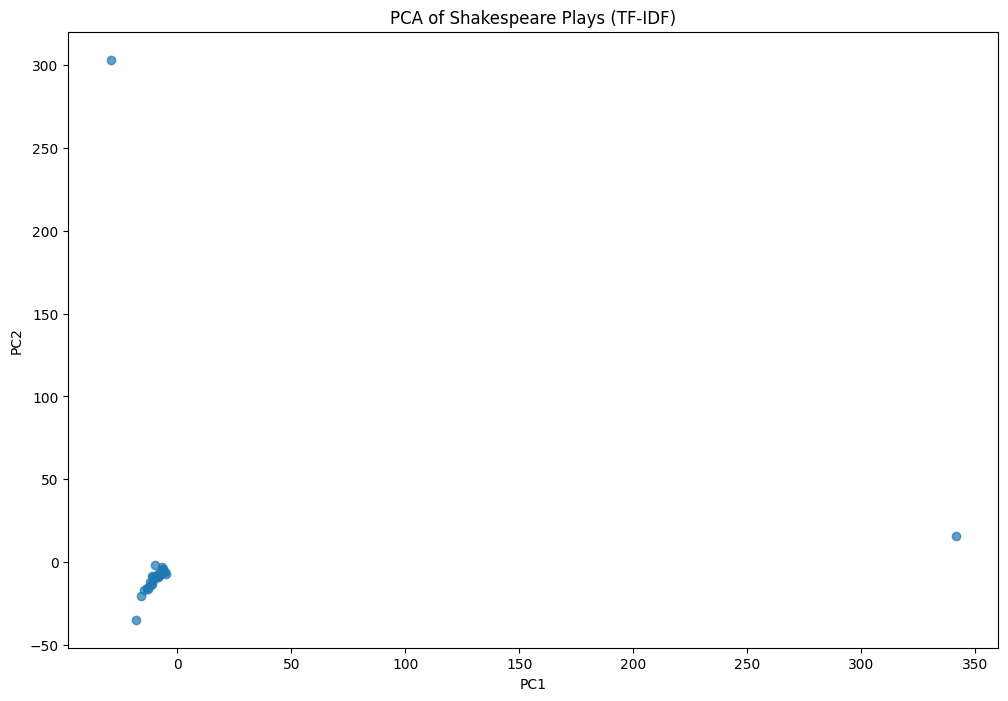

In [91]:
comedies = ['A Midsummer nights dream', 'As you like it', 'Loves Labours Lost', ...]
histories = ['Henry IV', 'Henry V', 'Richard III', ...]
tragedies = ['Hamlet', 'Macbeth', 'Romeo and Juliet', ...]

# 2.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
play_vectors = tfidf_matrix.T
reduced = pca.fit_transform(play_vectors)

plt.figure(figsize=(12, 8))

plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7)

plt.title("PCA of Shakespeare Plays (TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.savefig("play_clustering.png")
plt.show()


# Extra credit [15 points]

Quantifying the goodness of one vector space representation over another can be very difficult to do.  It might ultimately require testing how the different vector representations change the performance when used in a downstream task like question answering. A common way of quantifying the goodness of word vectors is to use them to compare the similarity of words with human similarity judgments, and then calculate the correlation of the two rankings.

If you would like extra credit on this assignment, you can quantify the goodness of each of the different vector space models that you produced (for instance by varying the size of the context window, picking PPMI or tf-idf, and selecting among cosine, Jaccard, and Dice).  You can calculate their scores on the [SimLex999 data set](https://www.cl.cam.ac.uk/~fh295/simlex.html), and compute their correlation with human judgments using [Kendall's Tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

- **Deliverables**:
    - **In your `report.pdf`**, explain what **experiments** you ran, and which **settings** *(i.e. size of the context window, picking PPMI or tf-idf, and selecting among cosine, Jaccard, and Dice)* had the highest correlation with human judgments.

- **Hint**:
    - For SimLex999 dataset, you only need to use `word1`, `word2`, and `SimLex999` columns, where `SimLex999` column is a **similarity rating by human beings** (ranging from 0 to 10) between `word1` and `word2`.
    - For Kendal's Tau, you can use check [this python implementation](https://www.geeksforgeeks.org/python-kendall-rank-correlation-coefficient/#) for reference.



In [92]:
# Approach:

# 1. Prepare the Data:

# Use the SimLex999 dataset, which provides human similarity ratings for word pairs.
# Focus on the columns: word1, word2, and SimLex999 (similarity ratings by humans).

# 2. Generate Vector Representations:

# Create different term-context matrices by varying the size of the context window.
# Apply different weighting schemes like PPMI and tf-idf to these matrices.
# Compute word vectors using these weighted matrices.

# 3. Compute Similarities:

# For each pair of words in the SimLex999 dataset, calculate their similarity using different metrics (cosine, Jaccard, and Dice) based on the generated word vectors.

# 4. Calculate Correlation:

# Compare the computed similarities with human judgments from the SimLex999 dataset.
# Calculate the correlation between the model's similarity scores and human judgments using Kendall's Tau.

# 5. Report Findings:

# Run experiments with different settings and record which configurations (context window size, weighting scheme, and similarity metric) yield
# the highest correlation with human judgments.

In [93]:
!rm -rf SimLex-999 SimLex-999.zip
!wget -q -O SimLex-999.zip https://www.cl.cam.ac.uk/~fh295/SimLex-999.zip
!unzip -q SimLex-999.zip
!ls


my_analysis.png       sample_data	SimLex-999.zip.2  vocab.txt
notebook-config.yaml  SimLex-999	SimLex-999.zip.3  will_play_text.csv
play_clustering.png   SimLex-999.zip	SimLex-999.zip.4
play_names.txt	      SimLex-999.zip.1	SimLex-999.zip.5


In [94]:
import pandas as pd

def load_simlex999(path):
    """
    Load SimLex-999 dataset and keep only needed columns.
    Returns a DataFrame with columns: word1, word2, human
    """
    df = pd.read_csv(path, sep="\t")
    df = df[["word1", "word2", "SimLex999"]]
    df = df.rename(columns={"SimLex999": "human"})
    return df


In [95]:
simlex_df = load_simlex999("SimLex-999/SimLex-999.txt")
simlex_df.head()


,word1,word2,human
0,old,new,1.58
1,smart,intelligent,9.20
2,hard,difficult,8.77
3,happy,cheerful,9.55
4,hard,easy,0.95


In [96]:
def get_similarity_fn(name):
    if name == "cosine":
        return cosine_sim
    if name == "jaccard":
        return jaccard_sim
    if name == "dice":
        return dice_sim
    raise ValueError("Unknown metric")

def score_simlex(simlex_df, vocab_list, word_vectors, metric_name):
    sim_fn = get_similarity_fn(metric_name)
    idx = {w:i for i,w in enumerate(vocab_list)}

    human_scores = []
    model_scores = []

    for w1, w2, h in zip(simlex_df["word1"], simlex_df["word2"], simlex_df["human"]):
        if w1 not in idx or w2 not in idx:
            continue
        v1 = word_vectors[idx[w1]]
        v2 = word_vectors[idx[w2]]
        human_scores.append(float(h))
        model_scores.append(sim_fn(v1, v2))

    tau = kendalls_tau(model_scores, human_scores)
    return tau, len(human_scores)


In [97]:
def run_extra_credit_experiments(tuples, vocab, simlex_df,
                                 window_sizes=(2,4,6,8),
                                 weightings=("ppmi","raw","tfidf"),
                                 metrics=("cosine","jaccard","dice")):

    results = []
    simlex_vocab = sorted(set(simlex_df["word1"]).union(set(simlex_df["word2"])))

    #  term-document（给 tfidf 用）
    term_doc_matrix = create_term_document_matrix(tuples, document_names, simlex_vocab)
    tfidf_matrix = create_tf_idf_matrix(term_doc_matrix)  # (|V_simlex|, num_docs)

    for ws in window_sizes:
        # term-context for this window size
        tc = create_term_context_matrix(tuples, simlex_vocab, context_window_size=ws)

        # raw word vectors
        raw_vecs = tc

        # ppmi word vectors
        ppmi_vecs = create_PPMI_matrix(tc)

        for weighting in weightings:
            if weighting == "raw":
                vecs = raw_vecs
            elif weighting == "ppmi":
                vecs = ppmi_vecs
            elif weighting == "tfidf":
                vecs = tfidf_matrix
            else:
                raise ValueError("bad weighting")

            for metric in metrics:
                tau, used = score_simlex(simlex_df, simlex_vocab, vecs, metric)
                results.append({
                    "window_size": ws,
                    "weighting": weighting,
                    "metric": metric,
                    "kendall_tau": tau,
                    "pairs_used": used
                })

    # best config
    best = max(results, key=lambda d: d["kendall_tau"])
    return best, results


In [98]:
import numpy as np

def cosine_sim(a, b, eps=1e-12):
    a = np.asarray(a).reshape(-1)
    b = np.asarray(b).reshape(-1)
    na = np.linalg.norm(a)
    nb = np.linalg.norm(b)
    if na < eps or nb < eps:
        return 0.0
    return float(np.dot(a, b) / (na * nb))

def jaccard_sim(a, b, eps=1e-12):
    a = np.asarray(a).reshape(-1)
    b = np.asarray(b).reshape(-1)
    A = a > eps
    B = b > eps
    inter = np.logical_and(A, B).sum()
    union = np.logical_or(A, B).sum()
    return float(inter / union) if union > 0 else 0.0

def dice_sim(a, b, eps=1e-12):
    a = np.asarray(a).reshape(-1)
    b = np.asarray(b).reshape(-1)
    A = a > eps
    B = b > eps
    inter = np.logical_and(A, B).sum()
    denom = A.sum() + B.sum()
    return float((2.0 * inter) / denom) if denom > 0 else 0.0


In [99]:
cosine_sim([1,0],[1,0])


1.0

In [100]:
import numpy as np

def kendalls_tau(x, y):
    """
    Compute Kendall's Tau-b correlation between two lists.
    x: model scores
    y: human scores
    """
    assert len(x) == len(y)
    n = len(x)

    concordant = 0
    discordant = 0
    tie_x = 0
    tie_y = 0

    for i in range(n):
        for j in range(i + 1, n):
            dx = np.sign(x[i] - x[j])
            dy = np.sign(y[i] - y[j])

            if dx == 0 and dy == 0:
                continue
            elif dx == 0:
                tie_x += 1
            elif dy == 0:
                tie_y += 1
            elif dx == dy:
                concordant += 1
            else:
                discordant += 1

    denom = np.sqrt(
        (concordant + discordant + tie_x) *
        (concordant + discordant + tie_y)
    )
    return (concordant - discordant) / denom if denom > 0 else 0.0


In [101]:
kendalls_tau([1, 2, 3], [1, 2, 3])


np.float64(1.0)

In [102]:
best, all_results = run_extra_credit_experiments(
    tuples=tuples,
    vocab=vocab,
    simlex_df=simlex_df,
    window_sizes=(2,4,6,8),
    weightings=("raw","ppmi","tfidf"),
    metrics=("cosine",)
)
best


{'window_size': 2,
 'weighting': 'ppmi',
 'metric': 'cosine',
 'kendall_tau': np.float64(0.06469693032308076),
 'pairs_used': 999}

In [103]:
best2, _ = run_extra_credit_experiments(
    tuples=tuples,
    vocab=vocab,
    simlex_df=simlex_df,
    window_sizes=(2,4,6,8),
    weightings=("ppmi",),
    metrics=("cosine","jaccard","dice")
)
best2


{'window_size': 2,
 'weighting': 'ppmi',
 'metric': 'cosine',
 'kendall_tau': np.float64(0.06469693032308076),
 'pairs_used': 999}

In [104]:
!ls


my_analysis.png       sample_data	SimLex-999.zip.2  vocab.txt
notebook-config.yaml  SimLex-999	SimLex-999.zip.3  will_play_text.csv
play_clustering.png   SimLex-999.zip	SimLex-999.zip.4
play_names.txt	      SimLex-999.zip.1	SimLex-999.zip.5


# Submission
### Congratulation on finishing your homework! Here are the deliverables you need to submit to GradeScope
- This notebook and py file: rename to `homework4.ipynb` and `homework4.py`. You can download the notebook and py file by going to the top-left corner of this webpage, `File -> Download -> Download .ipynb/.py`
- Your `report.pdf` with answers to Section 5 and optional Extra Credit